In [24]:
import cv2  
import matplotlib.pyplot as plt   


In [25]:
# Path to xml file containing HaaR cascade training https://github.com/opencv/opencv/tree/master/data/haarcascades
frontalface = 'haarcascade_frontalface_default.xml'
eye = 'haarcascade_eye.xml'

# Path to the image 
image = 'laiana.jpg'


#Performs the classification     
# It is this classifier that finds the portion of the image that corresponds to the faces
face_detection = cv2.CascadeClassifier(frontalface) 
eye_detection = cv2.CascadeClassifier(eye)

# loading the image
img = cv2.imread(image)  

#convert BGR to RGB so we can plot it with matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#load the image in grayscale for easy viewing
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) 
# looking for image coordinates  
faces = face_detection.detectMultiScale(gray_img, scaleFactor = 1.05, minNeighbors=5) #  

#identifies the photo coordinates and draws the ellipse 
for x,y,w,h in faces: 
  #face        
  center = (x + w//2, y + h//2)
  img = cv2.ellipse(img, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4) #desenha o retângulo ao redor da imagem 

  #eyes
  roi_gray = gray_img[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyes = eye_detection.detectMultiScale(roi_gray)
  for (ex,ey,ew,eh) in eyes:
    center_e = (ex + ew//2, ey + eh//2)
    cv2.ellipse(roi_color, center_e, (ew//2, eh//2), 0, 0, 360, (0, 0, 255), 4)
    # cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

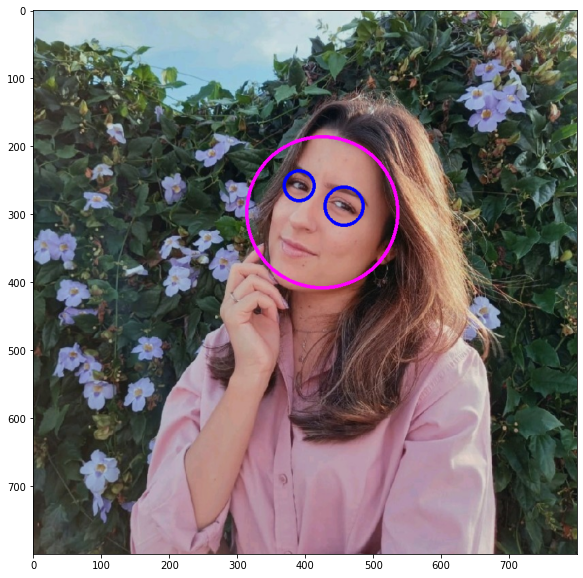

In [26]:
#define the size of the image to be plotted
plt.figure(figsize=(20,10))   
# show the image
plt.imshow(img) 
